<font size="+3">6d pose estimation using sd-maskrcnn</font> 

<font size =+1> Abstract </font> <br>
We present a method for 6d pose estimation of objects within a bin-picking scenario. The sd-maskrcnn framework is used to locate objects from a depth image of the bin and its contents, this network is trained using only synthetic data. The network provides us with a pixel-wise segmentation of the depth image. Using the obtained segmentation masks, original depth image and camera properites we are able to reconstruct the original 6d pose.

# setup

In [12]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt
from ipywidgets import fixed, interact
import ipywidgets
import sys
%matplotlib inline

sys.path.append('/home/frederik/Documents/GitHub/sd-maskrcnn/')

from pose_estimation import detection 
from autolab_core import YamlConfig
from pose_estimation.datasetControl import DatasetHandler
from pose_estimation.pointclouds import MaskedPointclouds, TemplatePointclouds
from pose_estimation.ICP import ICP

from autolab_core import YamlConfig


def show_dataset(data_set_dir, image_nbr, rgb=True): 
    """
        show a data set
        we show: rgb , depth, masks. 
    """
    rgb_path = 'images/color_ims/'
    depth_path = 'images/depth_ims/'
    masks_path = 'images/semantic_masks/'
    
    image_file = 'image_{:06d}.png'.format(image_nbr)
    
    if rgb:
        rgb_im = cv2.imread(data_set_dir + rgb_path + image_file)
        
    depth_im = cv2.imread(data_set_dir + depth_path + image_file)
    mask_im = cv2.imread(data_set_dir + masks_path + image_file)
    
    if rgb:
        plt.figure(figsize=(32,16))
        plt.subplot(1,3,1)
        plt.axis('off')
        plt.imshow(rgb_im)
        plt.title('RGB image')
        plt.subplot(1,3,2)
        plt.axis('off')
        plt.imshow(depth_im)
        plt.title('Depth image')
        plt.subplot(1,3,3)
        plt.axis('off')
        plt.imshow(mask_im)
        plt.title('Mask')
    else: 
        mask_im = np.array(mask_im)
        nbr_masks = len(np.unique(depth_im.reshape(-1)))
        for n in range(1,nbr_masks): 
            idx = np.where(depth_im == n)
            mask_im[idx] = 255 - n 
        
        plt.figure(figsize=(32,16))
        plt.subplot(1,2,1)
        plt.axis('off')
        plt.imshow(depth_im)
        plt.title('Depth image')
        plt.subplot(1,2,2)
        plt.axis('off')
        plt.imshow(mask_im)
        plt.title('Mask')
        
    
    
def show_results(depth_dir, pred_dir, indices_dir, image_nbr):
    #open indices_dir 
    test_idx = np.load(indices_dir)
    pred_idx = test_idx[image_nbr]

    depth_im = 'image_{:06d}.png'.format(pred_idx)
    pred_im =  'vis_{:06d}.png'.format(image_nbr)
    gt_im = 'gt_vis_{:06d}.png'.format(image_nbr)

    depth = cv2.imread(depth_dir+depth_im)
    pred = cv2.imread(pred_dir + 'vis/'+ pred_im)
    gt = cv2.imread(pred_dir + 'gt_vis/' + gt_im)
        
    plt.figure(figsize=(50,25))
    plt.subplot(1,3,1)
    plt.axis('off')
    plt.imshow(depth)
    plt.title('Input')
    plt.subplot(1,3,2)
    plt.axis('off')
    plt.imshow(pred)
    plt.title('Prediction')
    plt.subplot(1,3,3)
    plt.axis('off')
    plt.imshow(gt)
    plt.title('Ground Truth')
    

# synthetic data generation 

Include discription on how synthetic data is obtained

show top cam data 

show real cam data

<font size =+1> - Synthetic data obtained from top view </font>

In [13]:
data_set_dir = '/media/frederik/Samsung_T5/Datasets/ds_topViewCamera_10k/' 

im_nbr = ipywidgets.IntText(min=0, max=10000, value= 0, label="image number:")
interact(show_dataset, data_set_dir=fixed(data_set_dir), image_nbr = im_nbr)

interactive(children=(IntText(value=0, description='image_nbr'), Checkbox(value=True, description='rgb'), Outp…

<function __main__.show_dataset>

<font size =+1>- Synthetic data obtained with real camera </font>

In [14]:
data_set_dir = '/media/frederik/Samsung_T5/Datasets/realCamera_30k/' 

im_nbr = ipywidgets.IntText(min=0, max=10000, value= 0, label="image number:")
interact(show_dataset, data_set_dir=fixed(data_set_dir), image_nbr = im_nbr, rgb=fixed(False))

interactive(children=(IntText(value=0, description='image_nbr'), Output()), _dom_classes=('widget-interact',))

<function __main__.show_dataset>

# training of sd-maskrcnn

## training on topview data 

### Results using pretrained weights from paper

In [15]:
depth_dir = "/media/frederik/Samsung_T5/Datasets/topViewCamera_train_10k/depth_ims/"
pred_dir = "/media/frederik/Samsung_T5/Datasets/benchmarks/benchmark_pretrained/"
indices_dir = "/media/frederik/Samsung_T5/Datasets/topViewCamera_train_10k/test_indices.npy"
# 107/118/124/126/188/258
im_nbr = ipywidgets.IntText(min=0, max=10000, value= 107, label="number:")
interact(show_results,
         depth_dir=fixed(depth_dir),
         pred_dir = fixed(pred_dir), 
         indices_dir = fixed(indices_dir), 
         image_nbr = im_nbr)


interactive(children=(IntText(value=107, description='image_nbr'), Output()), _dom_classes=('widget-interact',…

<function __main__.show_results>

### training on 30k images for 2 epochs

In [ ]:
depth_dir = "/media/frederik/Samsung_T5/Datasets/topViewCamera_train_10k/depth_ims/"
pred_dir = "/media/frederik/Samsung_T5/Datasets/benchmarks/benchmark_results_zelf_30k/"
indices_dir = "/media/frederik/Samsung_T5/Datasets/topViewCamera_train_10k/test_indices.npy"

im_nbr = ipywidgets.IntText(min=0, max=10000, value= 107, label="number:")

interact(show_results,
         depth_dir=fixed(depth_dir),
         pred_dir = fixed(pred_dir), 
         indices_dir = fixed(indices_dir), 
         image_nbr = im_nbr)

### finetuning pretrained weights on 30k images (decreased learning rate)

In [ ]:
depth_dir = "/media/frederik/Samsung_T5/Datasets/topViewCamera_train_10k/depth_ims/"
pred_dir = "/media/frederik/Samsung_T5/Datasets/benchmarks/benchmark_finetuned_on30k/" 
indices_dir = "/media/frederik/Samsung_T5/Datasets/topViewCamera_train_10k/test_indices.npy"

im_nbr = ipywidgets.IntText(min=0, max=10000, value= 107, label="number:")

interact(show_results,
         depth_dir=fixed(depth_dir),
         pred_dir = fixed(pred_dir), 
         indices_dir = fixed(indices_dir), 
         image_nbr = im_nbr)

## training on true data

### 20 epochs with resnet35 backbone

In [16]:
depth_dir = "/media/frederik/Samsung_T5/Datasets/realCamera_train_30k/depth_ims/"
pred_dir = "/media/frederik/Samsung_T5/Datasets/benchmarks/benchmark_results_realCam_30k/" 
indices_dir = "/media/frederik/Samsung_T5/Datasets/realCamera_train_30k/test_indices.npy"

im_nbr = ipywidgets.IntText(min=0, max=10000, value= 107, label="number:")

interact(show_results,
         depth_dir=fixed(depth_dir),
         pred_dir = fixed(pred_dir), 
         indices_dir = fixed(indices_dir), 
         image_nbr = im_nbr)



interactive(children=(IntText(value=107, description='image_nbr'), Output()), _dom_classes=('widget-interact',…

<function __main__.show_results>

### 20 epochs with resnet101 backbone

# 6d pose estimation 

First with topview camera, eventually goal is to end with real camera. 

## using masks to get instance-pointclouds

In [5]:
pose_config = YamlConfig("/home/frederik/Documents/GitHub/sd-maskrcnn/cfg/6dpose.yaml")
dataset_config= YamlConfig("/home/frederik/Documents/GitHub/sd-maskrcnn/test_dataset_best/dataset_generation_params.yaml")
dataset_path = "/home/frederik/Documents/GitHub/sd-maskrcnn/test_dataset_best/"
depth_im_path = "images/depth_ims/" 

ds = DatasetHandler(dataset_path, depth_im_path)
detector = detection.Detector(pose_config)
icp = ICP(pose_config, dataset_config)

/home/frederik/Documents/GitHub/sd-maskrcnn/models/finetuned_on_30k/mask_rcnn_my_model_0002.h5


<font size =+1> Real time segmentation using sd-maskrcnn. Masks are added onto the depth image. </font>

saved to: /home/frederik/Documents/GitHub/sd-maskrcnn/notebooks


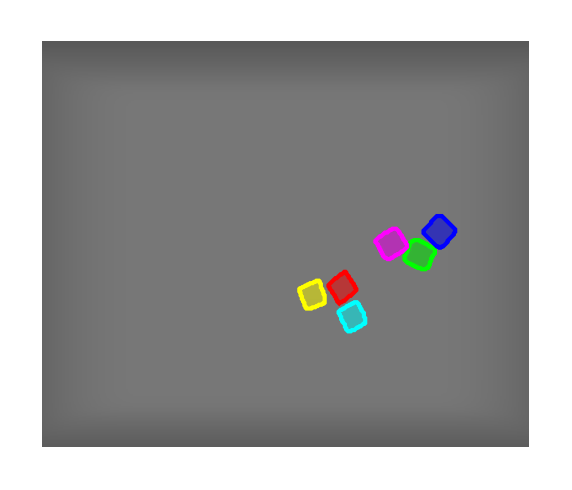

In [6]:
ds_image = ds.load_image()
_=detector.detect(ds_image)
ds_image.visualizePreditions()

<font size =+1> Specific parts from the depth image can be deprojected from the image plane, yielding a 3d pointcloud. Using the segmentation masks we are able to retrieve observed 3d pointclouds of the (detected) objects within the bin. </font>

In [ ]:
masked_pcls = MaskedPointclouds()
masked_pcls.feed_image(ds_image)
icp.feed_image(ds_image)

masked_pcls.render_masked_pointclouds()

<font size =+1> Noise presented within the obtained pointclouds due to imperfect masks is filtered away using dbscan clustering </font>

In [ ]:
(classes, pointclouds_cleaned) = masked_pcls.get_pointcloudsFor_ICP()
masked_pcls.render_masked_pointclouds(option='cleaned')

## Construct templates for recognized objects 

<font size=+1><p><u>Templates</u></p></font>
<br>
<font size =+0.5>
    We've obtained pointclouds of each instance recognized within the bin. In order to derive the 6d pose of this object we need to fit template pointclouds to them, of which we know the 6d pose initially and can track the transformation made upon them.
</font>
<br>
<br>
<font size=+1><p><u>Template contruction</u></p></font>
<font size=+0.5>
    We construct multiple templates for each object class recognized within the bin. For this we render multiple scenes with the object randomly located within it, from which we take a picture using the same camera as was used to make the bin picture. We can again construct the corresponding 3d pointclouds, for which we know the 6d pose.
</font>

In [ ]:
icp.show_templates(class_id=1, option='r')

In [ ]:
icp.perform_ICP(threshold=1)

In [ ]:
icp.render_results()

In [ ]:
icp.render_results(option='rmseBased')

## 6d pose estimation on real camera data

In [10]:
pose_config = YamlConfig("/home/frederik/Documents/GitHub/sd-maskrcnn/real_cam_dataset_2/6dpose.yaml")
dataset_config= YamlConfig("/home/frederik/Documents/GitHub/sd-maskrcnn/real_cam_dataset_2/dataset_generation_params.yaml")
dataset_path = "/home/frederik/Documents/GitHub/sd-maskrcnn/real_cam_dataset_2/"
depth_im_path = "images/trf_depth_ims/" 

ds_real = DatasetHandler(dataset_path, depth_im_path)
detector_real = detection.Detector(pose_config)

/home/frederik/Documents/GitHub/sd-maskrcnn/models/training_realCam_30k/mask_rcnn_topviewmodel10k_0020.h5


saved to: /home/frederik/Documents/GitHub/sd-maskrcnn/notebooks


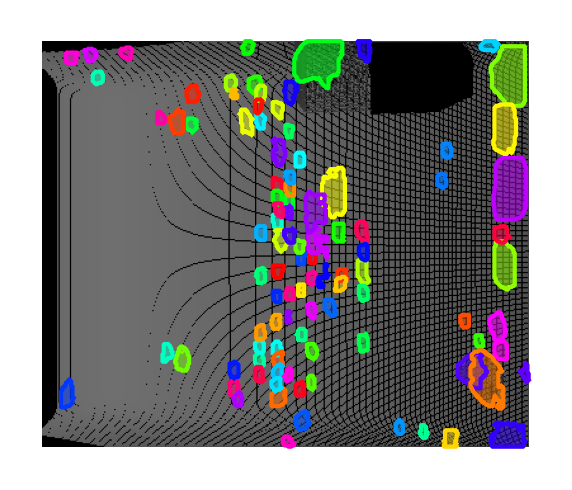

In [11]:
ds_image_real = ds_real.load_image()
_=detector_real.detect(ds_image_real)
ds_image_real.visualizePreditions()